In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import  stats
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [23]:
path = 'leavesFirst2Week/i01&e01&c1&p01&l3.csv'
data = pd.read_csv(path)

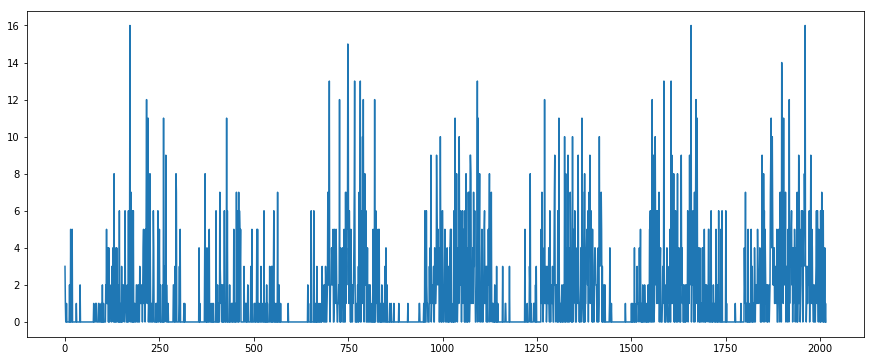

In [24]:
plt.figure(figsize=(15, 6))
plt.plot(range(2016), data.iloc[:2016,0])
plt.show()

In [51]:
diff1 = data.iloc[:2016,0].diff(1)[1:]#一阶差分,diff1[0]为Nan

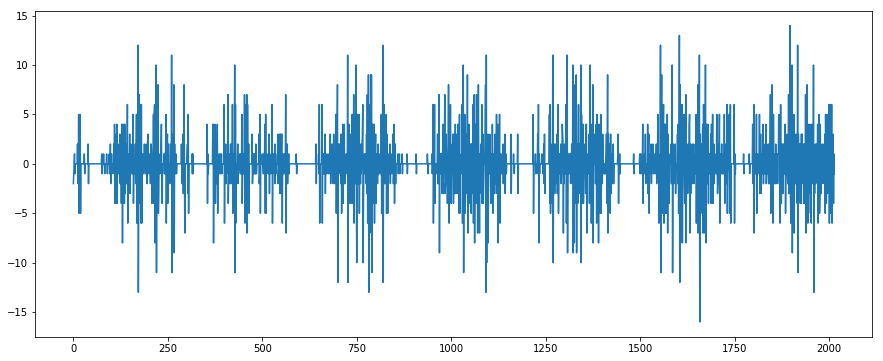

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(range(2015), diff1)
plt.show()

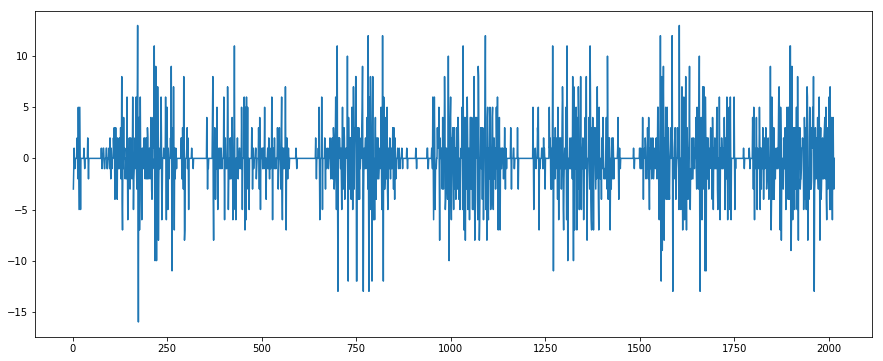

In [62]:
diff2 = data.iloc[:2016,0].diff(2)[2:]#一阶差分,diff2[0]、diff2[1]为Nan
plt.figure(figsize=(15, 6))
plt.plot(diff2)
plt.show()

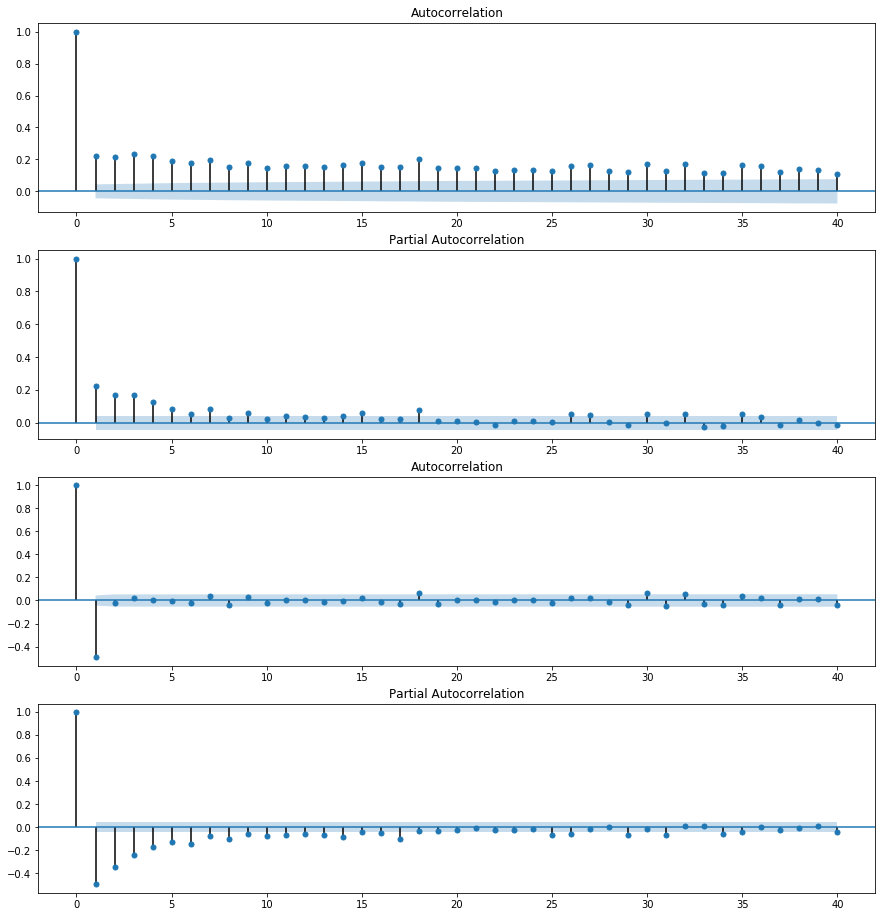

In [55]:
fig = plt.figure(figsize=(15,16))

ax0 = fig.add_subplot(411)
fig = sm.graphics.tsa.plot_acf(data.iloc[:2016,0], lags=40, ax=ax0)
ax1 = fig.add_subplot(412)
fig = sm.graphics.tsa.plot_pacf(data.iloc[:2016,0], lags=40, ax=ax1)
# 图一拖尾，图二拖尾，故使用ARMA模型
# https://www.jianshu.com/p/f9e4cfc69e12

ax2 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_acf(diff1, lags=40, ax=ax2)
ax3 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_pacf(diff1, lags=40, ax=ax3)

https://blog.csdn.net/weixin_42382211/article/details/81332431
https://bbs.pinggu.org/thread-869112-1-1.html
首先，我们要弄明各水平值的设定意义，1%：严格拒绝原假设；5%：拒绝原假设，10%类推。
这三个水平值是E-iews软件自己设定的，它表示拒绝原假设的不同程度。
ADF检验的原假设是存在单位根，一般EVIEWS输出的是ADF检验的统计值，只要这个统计值是小于1%水平下的数字就可以极显著的拒绝原假设，认为数据平稳。注意，ADF值一般是负的，也有正的，但是它只有小于1%水平下的才能认为是及其显著的拒绝原假设 。
一般在原序列条件下，如果存在非平稳状态，按以下步骤进行：
一阶差分是否具有单位根，就是比较一届差分的ADF检验值与5%临界值的大小，否则再看二阶差分的。
如果二阶都不单整，就要重新处理一下数据了。

In [56]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller
adftest0 = adfuller(data.iloc[:2016,0])
print('原始序列的检验结果为：',adftest0)
adftest1 = adfuller(diff1)
print('一阶差分的检验结果为：',adftest1)
adftest2 = adfuller(diff2)
print('二阶差分的检验结果为：',adftest2)

原始序列的检验结果为： (-5.37523424316354, 3.817421623520955e-06, 17, 1998, {'1%': -3.433627137787501, '5%': -2.8629876622368218, '10%': -2.5675406736265796}, 9011.796170968883)
一阶差分的检验结果为： (-14.210069852719668, 1.7276815277853245e-26, 25, 1989, {'1%': -3.4336419856688276, '5%': -2.862994217611322, '10%': -2.567544164035933}, 9030.889163252821)
二阶差分的检验结果为： (-12.885798376120352, 4.557042889102875e-24, 26, 1987, {'1%': -3.433645303487856, '5%': -2.8629956824317757, '10%': -2.5675449439803617}, 9094.358483821445)


In [57]:
#对序列做白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'白噪声检验结果：',acorr_ljungbox(data.iloc[:2016,0], lags= 1)) #返回统计量和 p 值

白噪声检验结果： (array([101.02885595]), array([9.0653133e-24]))


In [66]:
res=sm.tsa.arma_order_select_ic(data.iloc[:2016,0],max_ar=6,max_ma=4,ic=['aic','bic','hqic'])  # AIC/BIC/HQ/HQIC
print(res.aic_min_order)
print(res.bic_min_order)
print(res.hqic_min_order)

D:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

(1, 1)
(1, 1)
(1, 1)


D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [58]:
from statsmodels.tsa.arima_model import ARMA
arma_model = ARMA(data.iloc[:2016,0],(1,1))
model_fit = arma_model.fit()
print('lag: %s' % model_fit.k_ar)
print('coefficients: %s' % model_fit.params)

lag: 1
coefficients: const         1.528031
ar.L1.true    0.981827
ma.L1.true   -0.903143
dtype: float64


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predictions = model_fit.predict(start=0, end=len(data.iloc[:2016,0])-1)
print(len(predictions))
error = mean_squared_error(data.iloc[:2016,0], predictions)
print('Test MSE: %.3f' % error)
error = mean_absolute_error(data.iloc[:2016,0], predictions)
print('Test MAE: %.3f' % error)

2016
Test MSE: 5.326
Test MAE: 1.540


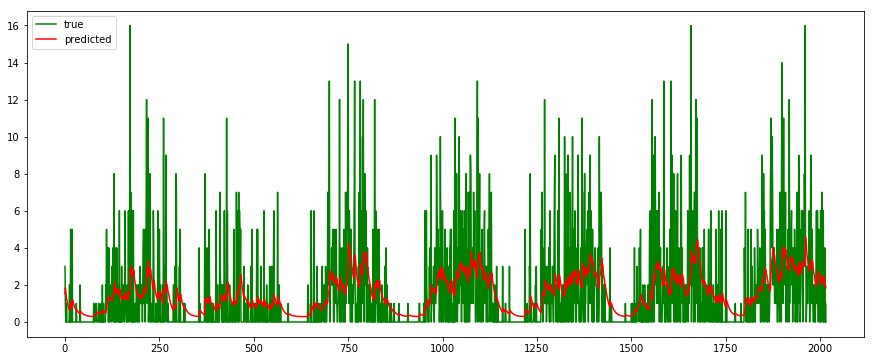

In [69]:
plt.figure(figsize=(15, 6))
plt.plot(data.iloc[:2016,0], label="true", color='green')
plt.plot(predictions, label="predicted",color="red")
plt.legend()
plt.show()

In [70]:
predictions.to_csv('ARMA_prediction.csv')

In [71]:
max(data.iloc[:2016,0])

16

In [72]:
max(predictions)

4.584977556493975

In [75]:
predictions_test = model_fit.predict(start=len(data.iloc[:2016,0]), end=2*len(data.iloc[:2016,0])-1)
len(predictions_test)
print(max(predictions_test))

1.6971314892410818


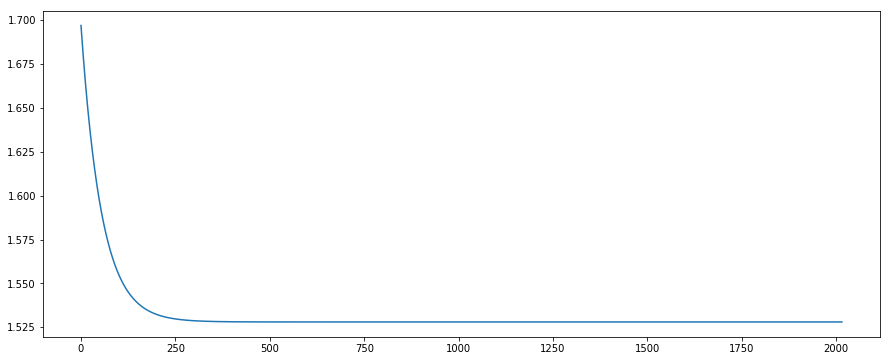

In [76]:
plt.figure(figsize=(15, 6))
plt.plot(range(2016),predictions_test)
plt.show()